In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Generando datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end = '2022-12-31')
values = np.arange(len(dates))* 0.2 + np.random.rand(len(dates)) * 50
ts = pd.Series(values, index=dates)

In [3]:
# Dividir los datos en entrenamiento y prueba
train_data = ts[:'2022-10-01']
test_data = ts['2022-10-02':]

In [4]:
# Ajustarel modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
# Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

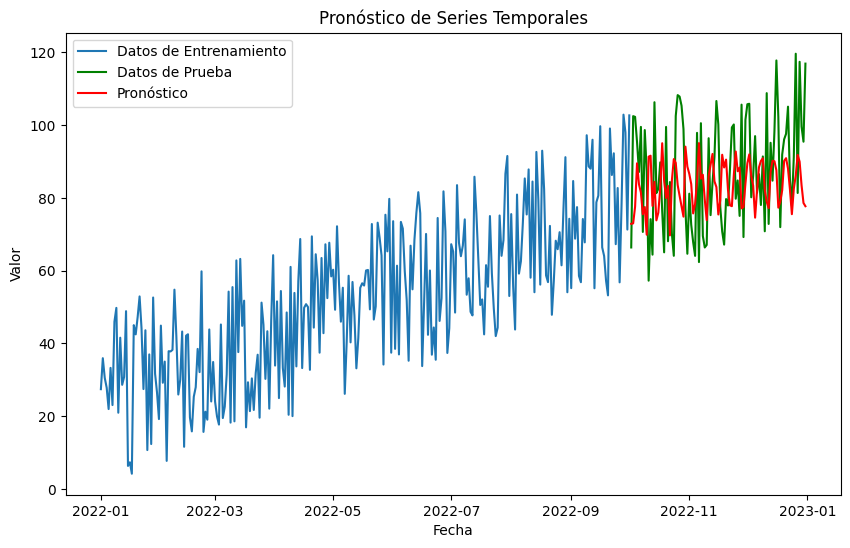

In [7]:
# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10,6))
plt.plot(train_data, label = 'Datos de Entrenamiento')
plt.plot(test_data, label= 'Datos de Prueba', color = 'green')
plt.plot(test_data.index, forecast, label = 'Pronóstico', color = 'red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()